Data science final project on Climate Change

In [1]:
import numpy
from matplotlib import pyplot
import pandas
from sklearn.linear_model import LinearRegression
import math
import os
import pathlib
from collections import Counter
from bs4 import BeautifulSoup
import requests
import re
# from selenium import webdriver
import time
from scipy.stats import linregress

## Introduction
Question: 
Is climate change affecting the rate and strength of storms?

Our goal is to compare and contrast anomalies in a climate with the variables such as damage from storms, and tornado intensity over the years.

Dataset 1:
National Centers for Environmental Information - National Weather Service (NWS).
Storm Events Database contains data from January 1950 to January 2019.
https://www.ncdc.noaa.gov/stormevents/ftp.jsp

The NWS split up data of all storm events into 69 files based on year. We extracted six variables from the data and joined all of the data into a single PANDAS data frame. Variables of interest include storm year, damage to property, damage to crops, direct deaths, direct injuries, and tornado intensity based on the Fujita-Pearson scale. Currently, this dataset has over 1.5 million rows of data. For analysis, a lot of this data will be consolidated into single year rows rather than multiple rows with the same year. Columns such as tornado intensity (F1, F2, …, F5) will need to be transformed into integers for easier calculations.

Dataset 2:
Data collected from GISS Surface Temperature (GISTEMP) and Climate at a Glance (GCAG) by DataHub. Contains data from 1880 to 2016.
https://datahub.io/core/global-temp

We have two variables for this set- year, and average global mean anomalies for temperature in Celsius. The base period for temperature, from where they obtained their mean is from 1951 to 1980. The second variable measures the difference from this mean, with negative being colder and positive being warmer.


## Data cleaning

In [2]:
storm_current_dir = os.getcwd()+'\data\storm-data'
storm_files = os.listdir(storm_current_dir)

## put all csv into one pandas framework 
wanted_columns = ["YEAR",'DAMAGE_PROPERTY', 'DEATHS_DIRECT', 'DAMAGE_CROPS', "STATE"]

##list of data frames
list_df = []
list_damage_property = []
list_deaths_direct = []
list_damage_crops = []
list_injuries_direct = []
list_tor_scale = []
list_events = []
state_with_most_damage = []
for file in storm_files:
    df = pandas.read_csv(storm_current_dir+"\/"+file, low_memory=False, dtype={})[wanted_columns]
    list_df.append(df)
    list_damage_property.append(df[["YEAR","DAMAGE_PROPERTY"]])
    list_deaths_direct.append(df[["YEAR", "DEATHS_DIRECT"]])
    list_damage_crops.append(df[["YEAR", "DAMAGE_CROPS"]])
    list_events.append(df[["YEAR"]])
    state_with_most_damage.append(df[["YEAR", "STATE", "DAMAGE_PROPERTY"]])
    
## Concat lists
storm_dataframe = pandas.concat(list_df)
damage_property = pandas.concat(list_damage_property)
deaths_direct = pandas.concat(list_deaths_direct)
damage_crops = pandas.concat(list_damage_crops)
events = pandas.concat(list_events)
state_with_most_damage = pandas.concat(state_with_most_damage)

## The graph below shows the estimated amount of damage to property incurred by the weather event amout of damage in dollars over time



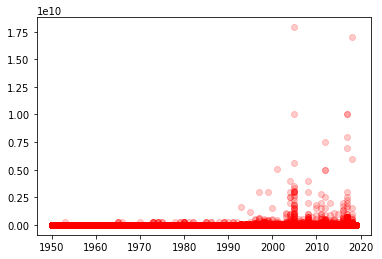

In [3]:
# Plot Linear Regressions for each dataset
#Damage to Property
#Property Damage
damage_property = damage_property[pandas.notnull(damage_property["DAMAGE_PROPERTY"])]
damage_property = damage_property[~damage_property["DAMAGE_PROPERTY"].str.contains("H")]
damage_property = damage_property[~damage_property["DAMAGE_PROPERTY"].str.contains("h")]
damage_property['DAMAGE_PROPERTY'] = damage_property['DAMAGE_PROPERTY'].str.extract(r'[\d\.]+([KMBTkmbt]+)', expand=False).fillna(1).replace(['K','M','B','T','k','m','b','t'], [10**3, 10**6, 10**9, 10**12,10**3, 10**6, 10**9, 10**12]).astype(int) * pandas.to_numeric(damage_property['DAMAGE_PROPERTY'].replace(r'[KMBTkmbt]+$', '', regex=True))

pyplot.scatter(damage_property["YEAR"], damage_property["DAMAGE_PROPERTY"], c = "red", alpha = 0.2)
pyplot.show()

# The number of deaths per year

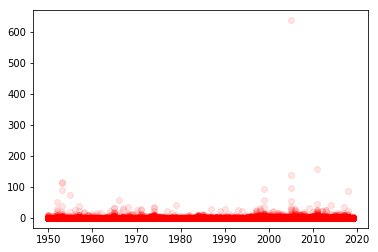

In [57]:
# Direct Deaths from storms
deaths_direct = deaths_direct[pandas.notnull(deaths_direct["DEATHS_DIRECT"])]
pyplot.scatter(deaths_direct["YEAR"], deaths_direct["DEATHS_DIRECT"], c = "red", alpha = 0.1)
pyplot.show()

## The graph below shows the the estimated amount of damage to crops incurred by the weather event over time

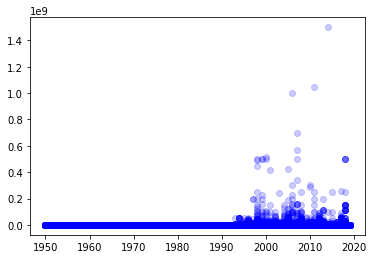

In [58]:
# Damage to Crops
# Damage to crops, K (x 1000) removed
damage_crops = damage_crops[pandas.notnull(damage_crops["DAMAGE_CROPS"])]
damage_crops["DAMAGE_CROPS"] = damage_crops["DAMAGE_CROPS"].apply(str).str.replace("?","")
a = damage_crops['DAMAGE_CROPS'].str.extract(r'[\d\.]+([KkMmBbTt]+)', expand=False).fillna(1).replace(['K','k','m','M','b','B','t','T'], [10**3,10**3, 10**6,10**6, 10**9,10**9,10**12,10**12]).astype(int)
b = pandas.to_numeric(damage_crops['DAMAGE_CROPS'].replace(r'[KkMmBbtT]+$', '', regex=True))
damage_crops['DAMAGE_CROPS'] =  a*b

pyplot.scatter(damage_crops["YEAR"], damage_crops["DAMAGE_CROPS"], c = "blue", alpha = 0.2)
pyplot.show()

## The graph below shows the relationship between the number of injuries directly related to the weather event and years

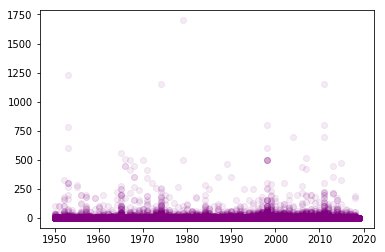

-------------statistics-------------


LinregressResult(slope=-0.010938945619827807, intercept=22.018209457291686, rvalue=-0.0319532543959106, pvalue=0.0, stderr=0.0002758179198186702)

In [59]:
# Direct Injuries
injuries_direct = injuries_direct[pandas.notnull(injuries_direct["INJURIES_DIRECT"])]

pyplot.scatter(injuries_direct["YEAR"], injuries_direct["INJURIES_DIRECT"], c = "purple", alpha = 0.08)
pyplot.show()

print("-------------statistics-------------")
linregress(injuries_direct['YEAR'],injuries_direct['INJURIES_DIRECT'])

## The graph below shows the number storms that occur  every year

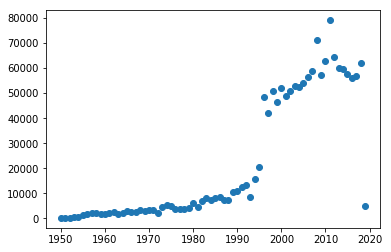

In [60]:
## Storms per year
counts = events["YEAR"].value_counts()
pyplot.scatter(counts.index, counts)
pyplot.show()

## The graph below shows the number storms that occur  every year (excluding  2019)

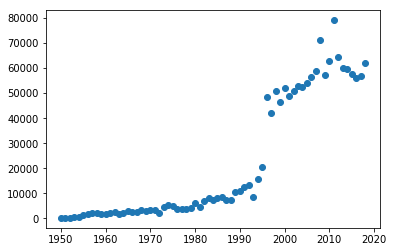

LinregressResult(slope=1109.3147241505299, intercept=-2178646.5141639267, rvalue=0.8844722126763008, pvalue=7.206354588405683e-24, stderr=71.4942771573492)

In [64]:
## Storms per year without incomplete 2019 point
counts_2018 = counts[counts.index != 2019]
pyplot.scatter(counts_2018.index, counts_2018)
pyplot.show()
linregress(counts_2018.index,counts_2018)

In [62]:
print("-------------statistics-------------")
linregress(counts_2018.index,counts_2018)

-------------statistics-------------


LinregressResult(slope=1109.3147241505299, intercept=-2178646.5141639267, rvalue=0.8844722126763008, pvalue=7.206354588405683e-24, stderr=71.4942771573492)

## Summary Statistics

In [63]:
stats_attributes = [[damage_property, 'DAMAGE_PROPERTY'], [deaths_direct,'DEATHS_DIRECT'], [damage_crops,'DAMAGE_CROPS']]
for attribute in stats_attributes:
    print('\n',attribute[1])
    print("Mean:", attribute[0][attribute[1]].mean())
    print("Median:", attribute[0][attribute[1]].median())
    print("Standard Deviation:", attribute[0][attribute[1]].std())
print("\nSTORM_COUNT")
print("Mean:", counts_2018.mean())
print("Median:", counts_2018.median())
print("Standard Deviation:", counts_2018.std())


 DAMAGE_PROPERTY
Mean: 476245.9566387748
Median: 0.0
Standard Deviation: 39102867.18903588

 DEATHS_DIRECT
Mean: 0.01171880837880179
Median: 0.0
Standard Deviation: 0.6372539902207364

 DAMAGE_CROPS
Mean: 68903.79740745387
Median: 0.0
Standard Deviation: 3560839.8399749054

STORM_COUNT
Mean: 22233.898550724636
Median: 7335.0
Standard Deviation: 25162.484858208194


## Which states have the highst damamge rates by year

In [11]:
state_with_most_damage = state_with_most_damage[pandas.notnull(state_with_most_damage["DAMAGE_PROPERTY"])]
state_with_most_damage = state_with_most_damage[~state_with_most_damage["DAMAGE_PROPERTY"].str.contains("H")]
state_with_most_damage = state_with_most_damage[~state_with_most_damage["DAMAGE_PROPERTY"].str.contains("h")]
state_with_most_damage['DAMAGE_PROPERTY'] = state_with_most_damage['DAMAGE_PROPERTY'].str.extract(r'[\d\.]+([KMBTkmbt]+)', expand=False).fillna(1).replace(['K','M','B','T','k','m','b','t'], [10**3, 10**6, 10**9, 10**12,10**3, 10**6, 10**9, 10**12]).astype(int) * pandas.to_numeric(state_with_most_damage['DAMAGE_PROPERTY'].replace(r'[KMBTkmbt]+$', '', regex=True))
state_with_most_damage = state_with_most_damage[state_with_most_damage['STATE'] != "ALASKA"]
state_with_most_damage = state_with_most_damage[state_with_most_damage['STATE'] != "HAWAII"]


In [12]:
## Make dict structure like so: year: [damage, state]
state_with_most_dam_by_year = {}
for row in state_with_most_damage.iterrows():
    year = row[1][0]
    state = row[1][1]
    damage = row[1][2]
    if year in state_with_most_dam_by_year:
        last_data = state_with_most_dam_by_year[year]
        if damage > last_data[0]:
            last_data[0] = damage
            last_data[1] = state
    else:
        state_with_most_dam_by_year[int(year)] = [damage, state]


## Record high damage from each year caused by storms

I added up the damage caused by each state and year and from that list took the highest damage from each year and plotted  this:

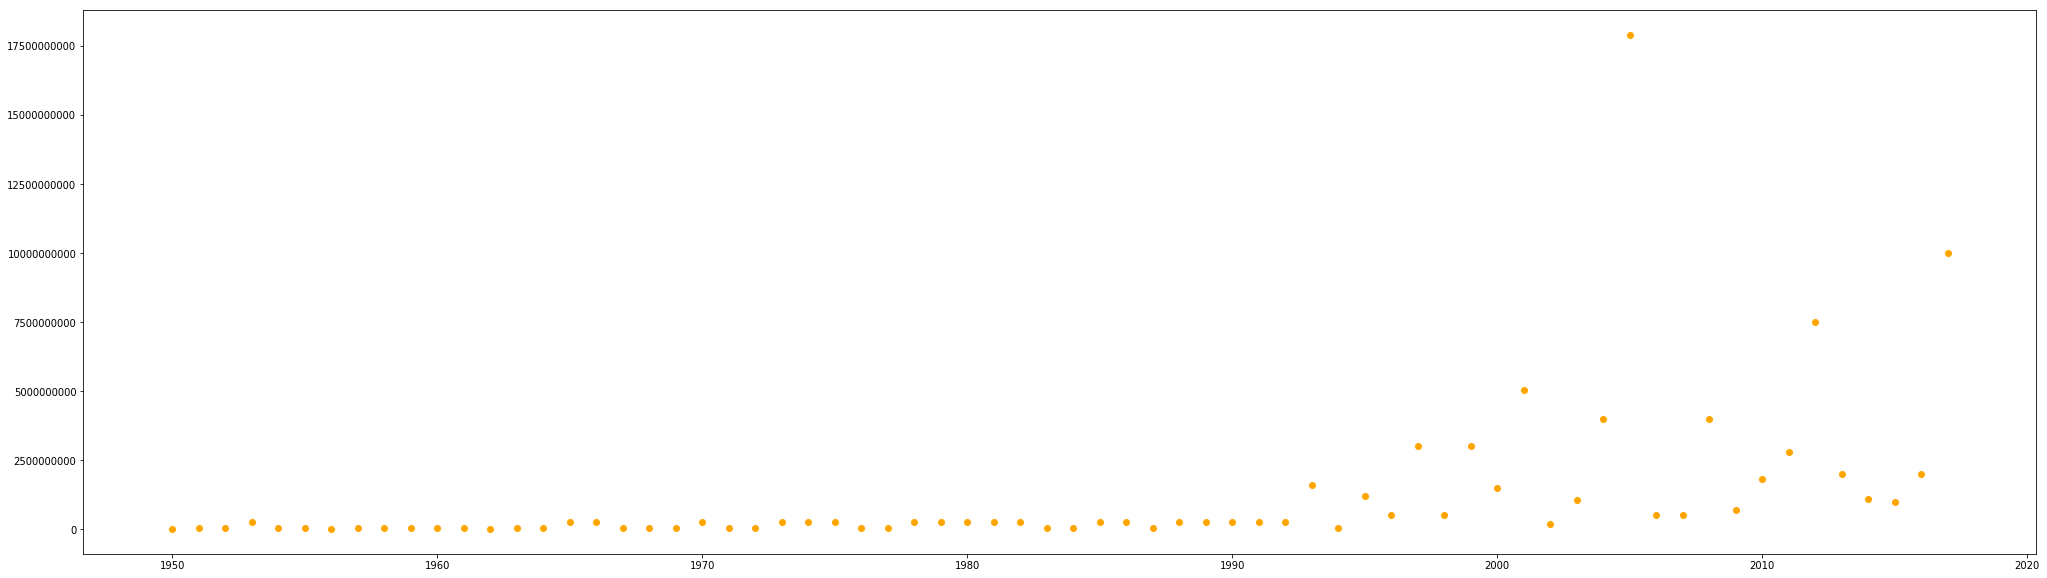

---------statistics---------
LinregressResult(slope=81916331.75009133, intercept=-161134864511.02176, rvalue=0.49833499395843317, pvalue=1.3157315296120692e-05, stderr=17410974.31323576)
Coefficient of Determination 0.24833776620355164


In [75]:
damage = [item[0] for item in list(state_with_most_dam_by_year.values())]
years = [item for item in list(state_with_most_dam_by_year.keys())]

pyplot.figure(figsize=(35,10))
pyplot.scatter(years[:-1], damage[:-1], c = "orange")
pyplot.ticklabel_format(style='plain', axis='y')
pyplot.show()

print("---------statistics---------")
print(linregress(years,damage))
print("Coefficient of Determination",linregress(years,damage)[2] ** 2)

### Collecting temperature data by state by year (base line temp is from 1901-2000)

In [14]:
for state in range(1,51):
    url = "https://www.ncdc.noaa.gov/cag/statewide/time-series/{}-tavg-12-12-1895-2019.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000".format(state)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    file = open("data/temperature_data/by_state/{}.csv".format(state), "w")
    file.write(soup.prettify())
    file.close()

In [15]:
#########################################temperature data by state by year####################################################
def split_it(year):
    return int((re.search('^\d\d\d\d', year)).group(0))

states_avg_tem = os.getcwd()+r'\data\temperature_data\by_state'
states_avg_tem_files = os.listdir(states_avg_tem)

avg_temp_by_state = []
count = 0
for file in states_avg_tem_files:
    state_file = pandas.read_csv(r"data\temperature_data\by_state\\"+file, skiprows = [1,2,3])
    temp = state_file.columns
    state_file['state'] = temp[0]
    state_file.columns = ["Date","Value","Anomaly","State"]
    state_file = state_file.drop(state_file.index[0])
    state_file['Date'] = state_file['Date'].apply(split_it)
    state_file['Anomaly'] = pandas.to_numeric(state_file['Anomaly'])
    avg_temp_by_state.append(state_file[["Date","Value","Anomaly","State"]])

In [16]:
temp_df = pandas.concat(avg_temp_by_state)
temp_df = temp_df[temp_df['State'].str.lower() != "hawaii"]
temp_df = temp_df[temp_df['State'].str.lower() != "alaska"]

In [17]:
total_anomaly_by_state = {}
for row in temp_df.iterrows():
    if row[1][0] in total_anomaly_by_state:
        current_anom = total_anomaly_by_state[row[1][0]][0]
        if row[1][2] > current_anom:
            total_anomaly_by_state[row[1][0]] = [row[1][2], row[1][3]] 
    else:
        total_anomaly_by_state[row[1][0]] = [row[1][2], row[1][3]]

In [18]:
## Make sure that they both have the same number of years
for k in total_anomaly_by_state.copy():
    if k < 1950 or k >2018:
        total_anomaly_by_state.pop(k, None)
        
for k in state_with_most_dam_by_year.copy():
    if k < 1950 or k >2018:
        state_with_most_dam_by_year.pop(k, None)

In [19]:
## browser automation to grab the distance_from_to
state_orders = []
chromedriver = "C:\chromedriver"
browser = webdriver.Chrome(executable_path=chromedriver)
for index in range(1950, 2018):
    state_1 = state_with_most_dam_by_year[index][1].lower()
    state_2 = total_anomaly_by_state[index][1].lower()
    
    ## calc the Straight line distance between the states
    url = "https://www.mapdevelopers.com/distance_from_to.php?&from={}&to={}".format(state_1.replace(" ", "%"), state_2.replace(" ", "%"))
    browser.get(url)
    time.sleep(3)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html')
    distance = soup.find('div', {'id': 'status'}).text
    km = [int(s) for s in distance.split() if s.isdigit()]
    state_orders.append([km[0], index])


## The distance between states which have been calculated to be most damaged and had the most change in temperature in ascending order by year 

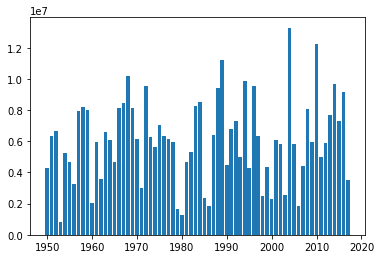

---------------statistics-------------------


LinregressResult(slope=76782131.39707813, intercept=-151006798614.6444, rvalue=0.47668413222001865, pvalue=3.0238329218095884e-05, stderr=17171204.779928613)

In [69]:
# state_orders = [[4305416, 1950], [6336642, 1951], [6638793, 1952], [847466, 1953], [5251054, 1954], [4678393, 1955], [3246293, 1956], [7931992, 1957], [8206916, 1958], [7989981, 1959], [2057314, 1960], [5957785, 1961], [3563955, 1962], [6600911, 1963], [6079953, 1964], [4678393, 1965], [8138256, 1966], [8459949, 1967], [10177682, 1968], [8138256, 1969], [6126621, 1970], [3022415, 1971], [9520834, 1972], [6257021, 1973], [5643612, 1974], [7046574, 1975], [6369736, 1976], [6159076, 1977], [5980817, 1978], [1646095, 1979], [1299633, 1980], [4703559, 1981], [5300443, 1982], [8258023, 1983], [8520885, 1984], [2374460, 1985], [1825467, 1986], [6414853, 1987], [9426815, 1988], [11204921, 1989], [4496446, 1990], [6772869, 1991], [7322445, 1992], [5012759, 1993], [9903719, 1994], [4262659, 1995], [9581462, 1996], [6323297, 1997], [2507407, 1998], [4362950, 1999], [2329002, 2000], [6079953, 2001], [5851094, 2002], [2566425, 2003], [13293565, 2004], [5801403, 2005], [1856688, 2006], [4431277, 2007], [8055957, 2008], [5980817, 2009], [12246091, 2010], [4996171, 2011], [5886736, 2012], [7687942, 2013], [9703489, 2014], [7322445, 2015], [9139432, 2016], [3502657, 2017]]

x = [item[1] for item in state_orders]
y = [item[0] for item in state_orders]
pyplot.bar(x, y)
pyplot.show()

print("---------------statistics-------------------")

linregress(years,damage)

## Number of storms events and Anomaly in temperature

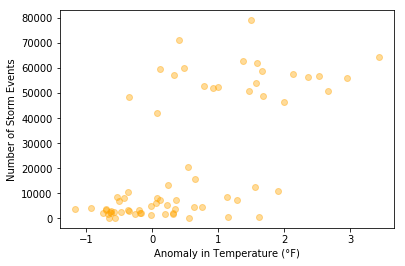

In [21]:
all_years = temp_df["Date"].value_counts()

acc = []
for index, value in all_years.items():
    year_climate = temp_df.loc[temp_df["Date"] == index]
    average = pandas.to_numeric(year_climate["Anomaly"]).mean()
    acc.append([index, average])
US_df =  pandas.DataFrame(acc, columns = ["Year", "Average_Anomalies"])
counts_2018 =  pandas.DataFrame({'Year':counts_2018.index, 'Storm_Amount':counts_2018.values})
US_df = US_df[pandas.to_numeric(US_df["Year"]) > 1949]

US_df["Year"] = pandas.to_numeric(US_df["Year"])
combined = US_df.merge(counts_2018, on = ["Year"])

pyplot.scatter(combined["Average_Anomalies"], combined["Storm_Amount"], c = "orange", alpha = 0.4)
pyplot.xlabel("Anomaly in Temperature (°F)")
pyplot.ylabel("Number of Storm Events")
pyplot.show()

In [73]:
print(combined.corr())
print('-------------More statistics----------------')
linresult = linregress(combined["Average_Anomalies"],combined["Storm_Amount"])
print(linresult)
print("Coefficient of Determination:", linresult[2] ** 2)

                       Year  Average_Anomalies  Storm_Amount
Year               1.000000           0.612641      0.884472
Average_Anomalies  0.612641           1.000000      0.650389
Storm_Amount       0.884472           0.650389      1.000000
-------------More statistics----------------
LinregressResult(slope=15638.05607876543, intercept=14412.509693697182, rvalue=0.6503890011241237, pvalue=1.462656658383315e-09, stderr=2231.2995640779372)
Coefficient of Determination: 0.4230058527832353


## Total Damage to Crops vs Anomaly in Temperature

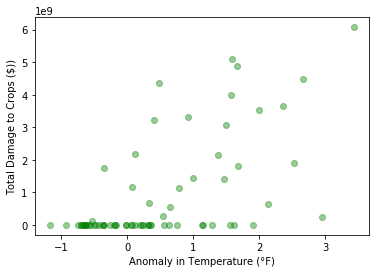

                       Year  Average_Anomalies  Total_Crop_Damage
Year               1.000000           0.612641           0.679336
Average_Anomalies  0.612641           1.000000           0.610785
Total_Crop_Damage  0.679336           0.610785           1.000000

-------------More statistics----------------
LinregressResult(slope=918327738.8512654, intercept=456660373.1693475, rvalue=0.6107852019895108, pvalue=2.50311751875683e-08, stderr=145440474.38005844)
Coefficient of Determination: 0.3730585629693675


In [70]:
acc_crops = []
for index, value in all_years.items():
    year_dmg = damage_crops.loc[damage_crops["YEAR"] == index]
    total_dmg = year_dmg["DAMAGE_CROPS"].astype(float).sum()
    acc_crops.append([index, total_dmg])
crops_frame = pandas.DataFrame(acc_crops, columns = ["Year", "Total_Crop_Damage"])
combined_crops = US_df.merge(crops_frame, on = ["Year"])


pyplot.scatter(combined_crops["Average_Anomalies"], combined_crops["Total_Crop_Damage"], c = "green", alpha = 0.4)
pyplot.xlabel("Anomaly in Temperature (°F)")
pyplot.ylabel("Total Damage to Crops ($))")
pyplot.show()
print(combined_crops.corr())
print('\n-------------More statistics----------------')
linresult = linregress(combined_crops["Average_Anomalies"],combined_crops["Total_Crop_Damage"])
print(linresult)
print("Coefficient of Determination:", linresult[2] ** 2)

## Total Damage to Property vs Anomaly in Temperature

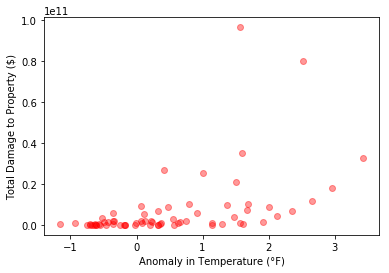

                           Year  Average_Anomalies  Total_Property_Damage
Year                   1.000000           0.612641               0.513648
Average_Anomalies      0.612641           1.000000               0.476865
Total_Property_Damage  0.513648           0.476865               1.000000

-------------More statistics----------------
LinregressResult(slope=7372473100.03114, intercept=3417862427.6497645, rvalue=0.47686531671898874, pvalue=3.436154608416962e-05, stderr=1660187966.193892)
Coefficient of Determination: 0.22740053028950144


In [71]:
acc_property = []
for index, value in all_years.items():
    year_dmg = damage_property.loc[damage_property["YEAR"] == index]
    total_dmg = year_dmg["DAMAGE_PROPERTY"].sum()
    acc_property.append([index, total_dmg])
property_frame = pandas.DataFrame(acc_property, columns = ["Year", "Total_Property_Damage"])
combined_property = US_df.merge(property_frame, on = ["Year"])

pyplot.scatter(combined_property["Average_Anomalies"], combined_property["Total_Property_Damage"], c = "red", alpha = 0.4)
pyplot.xlabel("Anomaly in Temperature (°F)")
pyplot.ylabel("Total Damage to Property ($)")
pyplot.show()
print(combined_property.corr())
print('\n-------------More statistics----------------')
linresult = linregress(combined_property["Average_Anomalies"],combined_property["Total_Property_Damage"])
print(linresult)
print("Coefficient of Determination:", linresult[2] ** 2)

## Direct Deaths vs Anomaly in Temperature

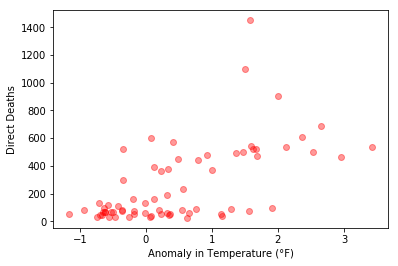

                       Year  Average_Anomalies  Total_Deaths
Year               1.000000           0.612641      0.620219
Average_Anomalies  0.612641           1.000000      0.604287
Total_Deaths       0.620219           0.604287      1.000000

-------------More statistics----------------
LinregressResult(slope=163.24001078145747, intercept=179.19593059798183, rvalue=0.6042866720137868, pvalue=3.8449843593544676e-08, stderr=26.295263338795742)
Coefficient of Determination: 0.365162381973498


In [72]:
acc_deaths = []
for index, value in all_years.items():
    year_deaths = deaths_direct.loc[deaths_direct["YEAR"] == index]
    total_deaths = year_deaths["DEATHS_DIRECT"].sum()
    acc_deaths.append([index, total_deaths])
deaths_df = pandas.DataFrame(acc_deaths, columns = ["Year", "Total_Deaths"])
deaths_combined = US_df.merge(deaths_df, on = ["Year"])

pyplot.scatter(deaths_combined["Average_Anomalies"], deaths_combined["Total_Deaths"], c = "red", alpha = 0.4)
pyplot.xlabel("Anomaly in Temperature (°F)")
pyplot.ylabel("Direct Deaths")
pyplot.show()
print(deaths_combined.corr())
print('\n-------------More statistics----------------')
linresult = linregress(deaths_combined["Average_Anomalies"],deaths_combined["Total_Deaths"])
print(linresult)
print("Coefficient of Determination:", linresult[2] ** 2)